# Dados

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
import shutil
from module import data_read, setup
from torch.utils.data import ConcatDataset
from module.LightningModule import ClassificationModule
from module.setup import *
from module.data_read import *

torch.manual_seed(random_state)

DDR_DIR = Path.cwd() / 'DDR-dataset/DR_grading'
IDRID_DIR = Path.cwd() / 'IDRID-Classificacao'
#FGADR_DIR = Path.cwd() / 'FGADR Dataset/Seg-set'

# Lighting Module

## Binary

In [4]:
# Leitura DDR
train_ddr_dataset = DDRDataset(DDR_DIR/'train',
                           DDR_DIR/'train.txt',           
                           convert_to_binary=True)
valid_ddr_dataset = DDRDataset(DDR_DIR/'valid',
                           DDR_DIR/'valid.txt',         
                           convert_to_binary=True)
test_ddr_dataset = DDRDataset(DDR_DIR/'test',
                          DDR_DIR/'test.txt',          
                          convert_to_binary=True)

ddr_dataset = ConcatDataset([train_ddr_dataset, valid_ddr_dataset, test_ddr_dataset])



# Leitura IDRID
train_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/a. Training Set',
                                   IDRID_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',
                                   data_transforms['test'],
                                   convert_to_binary=True)
test_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/b. Testing Set',
                                  IDRID_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',                   
                                  data_transforms['test'],
                                  convert_to_binary=True)
idrid_dataset = ConcatDataset([train_idrid_dataset, test_idrid_dataset])

#### ResNet50 Instanciation

In [12]:
from torchvision import models
from torch import nn

# Instanciação ResNet50
res50_best_weights = models.ResNet50_Weights.DEFAULT
res50_model = models.resnet50(weights=res50_best_weights)
for param in res50_model.parameters():
    param.requires_grad = False

num_ftrs = res50_model.fc.in_features

res50_model.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
res50_model

#### Execution

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


FOLD 0
--------------------------------



  | Name        | Type             | Params
-------------------------------------------------
0 | model       | ResNet           | 23.5 M
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
4.1 K     Trainable params
23.5 M    Non-trainable params
23.5 M    Total params
94.049    Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TEST FOLD 0




Testing: |                                                                                                    …

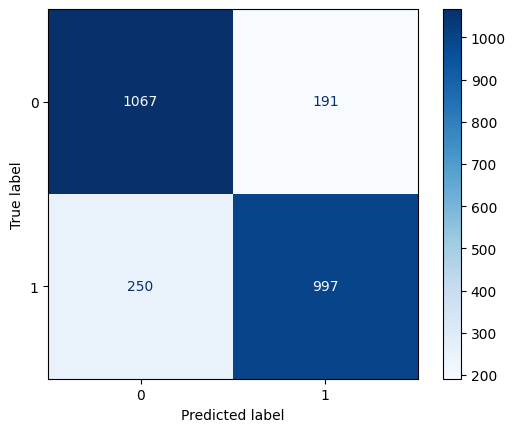

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1258
           1       0.84      0.80      0.82      1247

    accuracy                           0.82      2505
   macro avg       0.82      0.82      0.82      2505
weighted avg       0.82      0.82      0.82      2505

0.8239520958083832
0.8188911704312115
0.8392255892255892
0.7995188452285485
0.8481717011128775
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8239520788192749
         test_f1             0.818891167640686
     test_precision         0.8392255902290344
       test_recall          0.7995188236236572
────────────────────────────────────────────────────────────────────────────────────────────────────────

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TESTE IDRID 




Testing: |                                                                                                    …

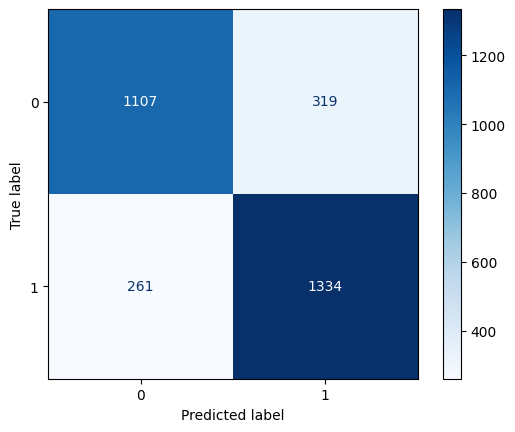

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1426
           1       0.81      0.84      0.82      1595

    accuracy                           0.81      3021
   macro avg       0.81      0.81      0.81      3021
weighted avg       0.81      0.81      0.81      3021

0.8080105925190334
0.8214285714285714
0.8070175438596491
0.8363636363636363
0.7762973352033661
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8080105781555176
         test_f1            0.8214285969734192
     test_precision         0.8070175647735596
       test_recall          0.8363636136054993
────────────────────────────────────────────────────────────────────────────────────────────────────────

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


FOLD 1
--------------------------------



  | Name        | Type             | Params
-------------------------------------------------
0 | model       | ResNet           | 23.5 M
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
4.1 K     Trainable params
23.5 M    Non-trainable params
23.5 M    Total params
94.049    Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TEST FOLD 1




Testing: |                                                                                                    …

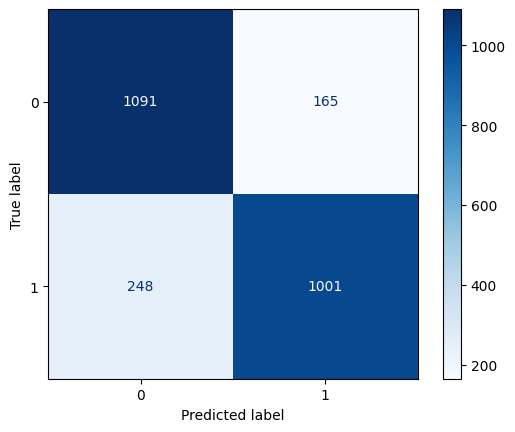

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1256
           1       0.86      0.80      0.83      1249

    accuracy                           0.84      2505
   macro avg       0.84      0.84      0.83      2505
weighted avg       0.84      0.84      0.83      2505

0.835129740518962
0.8289855072463768
0.8584905660377359
0.8014411529223379
0.8686305732484076
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8351297378540039
         test_f1            0.8289855122566223
     test_precision         0.8584905862808228
       test_recall          0.8014411330223083
─────────────────────────────────────────────────────────────────────────────────────────────────────────

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TESTE IDRID 




Testing: |                                                                                                    …

In [ ]:
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import KFold

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

for fold, (train_ids, test_ids) in enumerate(kfold.split(ddr_dataset)):
    print(f'FOLD {fold}')
    print('--------------------------------')
    # Divide os dados com base nos atuais indices do K-fold
    train_dataset = torch.utils.data.Subset(ddr_dataset, train_ids)
    test_dataset = torch.utils.data.Subset(ddr_dataset, test_ids)


    # Definição dos dataloaders
    trainloader = torch.utils.data.DataLoader(
                      train_dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=5)
    testloader = torch.utils.data.DataLoader(
                      test_dataset,
                      batch_size=batch_size,
                      shuffle=False,
                      num_workers=5)
    idridloader = torch.utils.data.DataLoader(
                      idrid_dataset,
                      batch_size=batch_size,
                      num_workers=5)

    # DEBUG:
    # trainer = L.Trainer(fast_dev_run=4) # a execução do trainer se limitará a 2 batches
    # trainer = L.Trainer(limit_train_batches=30, max_epochs=1) # usar apenas 30% dos dados de cada lote de treino
    trainer = L.Trainer(default_root_dir='checkpoints kfold/', accelerator='gpu', max_epochs=num_epochs)


    model = res50_model
    # treino
    model = ClassificationModule(model, loss_function, optim.Adam)
    trainer.fit(model=model, train_dataloaders=trainloader)
    # teste
    print(f'\n\n TEST FOLD {fold}\n\n')    
    trainer.test(model=model, dataloaders=testloader) # test na fold de test 
    print('\n\n TESTE IDRID \n\n')    
    trainer.test(model=model, dataloaders=idridloader) # test no idrid
    